In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import stable_baselines3 as sb
from copy import deepcopy

from src.envs import board

In [6]:
starts = np.array([[0, 0], [3, 0], [3, 3]])
targets = np.array([[3, 0], [0, 0], [0, 3]])
obstacles = np.array([[1, 1]])
env = board.env(starts, targets, obstacles, max_timesteps=100).unwrapped.to_gym()

In [7]:
model = sb.DQN('MultiInputPolicy', env, verbose=2)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [8]:
from stable_baselines3.common.callbacks import EvalCallback
eval_env = deepcopy(env)
eval_callback = EvalCallback(eval_env,
                             n_eval_episodes=1,
                             eval_freq=10,
                             best_model_save_path='./logs/',
                             log_path='./logs/',
                             deterministic=True, render=False)

In [9]:
model = sb.DQN('MultiInputPolicy', env, verbose=2)
model.learn(10000, callback=eval_callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/wessle-laptop/work/SoCG21/.venv/lib64/python3.7/site-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=10, episode_reward=-16060.00 +/- 0.00
Episode length: 100.00 +/- 0.00
-----------------------------------
| eval/               |           |
|    mean_ep_length   | 100       |
|    mean_reward      | -1.61e+04 |
| rollout/            |           |
|    exploration rate | 0.991     |
| time/               |           |
|    total timesteps  | 10        |
-----------------------------------
New best mean reward!
Eval num_timesteps=20, episode_reward=-16060.00 +/- 0.00
Episode length: 100.00 +/- 0.00
-----------------------------------
| eval/               |           |
|    mean_ep_length   | 100       |
|    mean_reward      | -1.61e+04 |
| rollout/            |           |
|    exploration rate | 0.982     |
| time/               |           |
|    total timesteps  | 20        |
-----------------------------------
Eval num_timesteps=30, episode_reward=-16060.00 +/- 0.00
Episode length: 100.00 +/- 0.00
-----------------------------------
| eval/               |    

KeyboardInterrupt: 

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


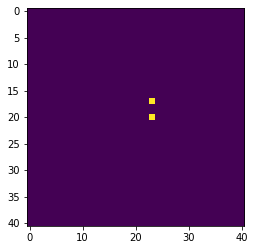

In [41]:
env.reset()
print(env.state['bot_0'])
import matplotlib.pyplot as plt
plt.imshow(env.state['bot_0'][0])